In [1]:
import numpy as np
import pandas as pd

In [2]:
cd ml-100k/

/Users/yongli/A-Teaching/PDS/code/recsys/ml-100k


In [3]:
names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=names)
df.head()

user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [4]:
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print str(n_users) + ' users'
print str(n_items) + ' items'

943 users
1682 items


In [34]:
ratingsNum = np.zeros((n_users, n_items))
for row in df.itertuples():
    ratingsNum[row[1]-1, row[2]-1] = 1
print ratingsNum

[[1. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [6]:
itemRateNumCurrent = ratingsNum.sum(axis=0)

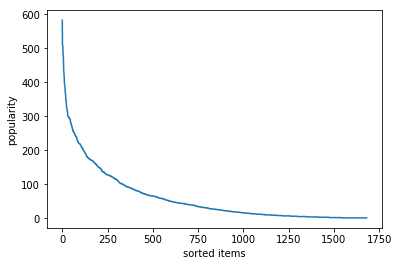

In [13]:
itemRateNumCurrent.sort()

itemRateNumCurrent
import matplotlib.pyplot as plt
plt.plot(itemRateNumCurrent[::-1])
plt.xlabel('sorted items') # adds label to x axis
plt.ylabel('popularity') # adds label to y axis
plt.show()

In [8]:
ratings = np.zeros((n_users, n_items))
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
print ratings

[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [35]:
itemRateNum = ratingsNum.sum(axis=0)
itemRateSum = ratings.sum(axis=0)
itemRateAvg = itemRateSum/itemRateNum
print itemRateAvg
print itemRateNum

[3.87831858 3.20610687 3.03333333 ... 2.         3.         3.        ]
[452. 131.  90. ...   1.   1.   1.]


In [30]:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('u.item', sep='|', names=i_cols, encoding='latin-1')

items.head()

movie id        movie title release date  video release date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's   ...     Fantasy  Film-Noir  Horror  \
0          0          1           1   ...           0          0       0   
1          1          0           0   ...           0          0       0   
2          0          0           0   ...           0          0       0   
3          0          0           0   ...           0          0       0   
4          0          0           0   ...           0          0       0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0       0         0    0        0  
1        0        0        0       0         1    0        0  
2        0        0        0       0         1    0        0  
3        0        0        0       0         0    0        0  
4        0        0        0       0         1    0        0  

[5 rows x 24 columns]

In [36]:
#Implementation of MovieAvg to recommend the top_n = 5 movies to the activeUser = 0
#change top_n to a larger number to recommend more movie

top_n = 5
activeUser = 0
mask_activeUser = ratings[activeUser, :] > 0
itemRateAvgCurrent = itemRateAvg.copy()
itemRateAvgCurrent[mask_activeUser] = 0
itemSortInd = itemRateAvgCurrent.argsort()
print 'movie ID' + '\t movie title'
print items['movie title'][itemSortInd[range(len(itemSortInd)-1,len(itemSortInd)-top_n-1, -1)]]

movie ID	 movie title
1535                                 Aiqing wansui (1994)
1652    Entertaining Angels: The Dorothy Day Story (1996)
1200           Marlene Dietrich: Shadow and Light (1996) 
1598                        Someone Else's America (1995)
1121                       They Made Me a Criminal (1939)
Name: movie title, dtype: object


In [37]:
#Implementation of TopPop to recommend the top_n = 5 movies to the activeUser = 0

top_n = 5
activeUser = 0
mask_activeUser = ratings[activeUser, :] > 0
itemRateNumCurrent = itemRateNum.copy()
print itemRateNumCurrent
itemRateNumCurrent[mask_activeUser] = 0
itemSortInd = itemRateNumCurrent.argsort()
print 'movie ID' + '\t movie title'
print items['movie title'][itemSortInd[range(len(itemSortInd)-1,len(itemSortInd)-top_n-1, -1)]]

[452. 131.  90. ...   1.   1.   1.]
movie ID	 movie title
293               Liar Liar (1997)
285    English Patient, The (1996)
287                  Scream (1996)
299           Air Force One (1997)
312                 Titanic (1997)
Name: movie title, dtype: object
